In [125]:
%pip install yfinance # yahoo finance 사용

# 코랩에서 한글 폰트를 사용하기 위한 과정

# 1. 아래코드 실행하여 폰트 다운
%sudo apt-get install -y fonts-nanum
%sudo fc-cache -fv
%rm ~/.cache/matplotlib -rf

# 2. 코랩의 런타임 다시시작(상단Bar에 '런타임' - '런타임 다시 시작')
# 3. 런타임 다시시작 완료했으면, 아래코드 실행

Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '#'
UsageError: Line magic function `%sudo` not found.


In [126]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# sns.set(font='NanumBarunGothic', font_scale=2.5) # colab
sns.set(font='Malgun Gothic', font_scale=2.5) # local
plt.rcParams['axes.unicode_minus'] = False

In [127]:
import pandas as pd

original = pd.read_csv('신규청약_20221121.csv', encoding='cp949')
original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 22 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   신규상장일      599 non-null    object 
 1   기업명        599 non-null    object 
 2   공모가        599 non-null    int64  
 3   시초가        599 non-null    int64  
 4   첫날종가       599 non-null    int64  
 5   희망공모가_하한   599 non-null    int64  
 6   희망공모가_상한   599 non-null    int64  
 7   확정공모가      599 non-null    int64  
 8   기관경쟁률      599 non-null    float64
 9   청약경쟁률      599 non-null    float64
 10  주간사        599 non-null    object 
 11  총공모주식수     599 non-null    int64  
 12  신주모집       599 non-null    int64  
 13  구주매출       599 non-null    int64  
 14  공모금액(백만원)  599 non-null    int64  
 15  매출액(백만원)   599 non-null    int64  
 16  순이익(백만원)   599 non-null    int64  
 17  자본금(백만원)   599 non-null    int64  
 18  시장구분       599 non-null    object 
 19  의무보유확약비율   599 non-null    float64
 20  구주매출비율    

In [128]:
original

신규상장일        기업명    공모가    시초가   첫날종가  희망공모가_하한  희망공모가_상한  확정공모가  \
0    2022-11-18         엔젯  10000   9000  10850     12000     15200  10000   
1    2022-11-18        유비온   2000   1850   1745      1800      2000   2000   
2    2022-11-17  티쓰리엔터테인먼트   1700   2445   2085      1500      1700   1700   
3    2022-11-17       티에프이  10500  10000   9260      9000     10500  10500   
4    2022-11-14     윤성에프앤씨  49000  44100  40450     53000     62000  49000   
..          ...        ...    ...    ...    ...       ...       ...    ...   
594  2014-08-01      덕신하우징  13000  21650  20950      9600     11000  13000   
595  2014-07-30      창해에탄올   8300  16600  14600      6000      6900   8300   
596  2014-07-25       윈하이텍   8300  13300  15250      6600      7500   8300   
597  2014-07-24      아진엑스텍   7000   7900   7060      5000      6000   7000   
598  2014-07-22  화인베스틸(유가)   4700   4490   5160      4500      5100   4700   

       기관경쟁률    청약경쟁률  ...      신주모집    구주매출  공모금액(백만원)  매출액(백만원)  순이익(백만원)  \
0      42.15     1.86  ...   2100000       0      21000     10055    -29867   
1     736.72    57.80  ...   2760000       0       5520     28067      1441   
2    1744.08  1384.30  ...  17000000       0      28900     68666     10106   
3    1295.18    87.78  ...   2300000  400000      28350     71969      9849   
4      67.49     1.73  ...   1695548  299214      97743     75894     -2915   
..       ...      ...  ...       ...     ...        ...       ...       ...   
594   650.72   899.07  ...   2000000       0      26000    104434     11718   
595   578.20   675.79  ...   1900871       0      15777     69032     14887   
596   444.10   589.58  ...   2640000       0      21912     57400      7122   
597   478.65   876.27  ...   1000000       0       7000     18913      3278   
598    85.45   248.12  ...   6433560       0      30238    224271     16948   

     자본금(백만원)  시장구분  의무보유확약비율 구주매출비율  종속변수  
0        5258   코스닥      6.00   0.00     0  
1        1971   코스닥      1.11   0.00     0  
2        6558   코스닥      4.03   0.00     0  
3        1138   코스닥      5.30  14.81     0  
4         797   코스닥      0.14  15.00     0  
..        ...   ...       ...    ...   ...  
594      4006   코스닥     59.86   0.00     0  
595      3087   코스닥     59.50   0.00     1  
596      3300   코스닥     55.60   0.00     0  
597      2815   코스닥      0.00   0.00     0  
598     16050   거래소      0.00   0.00     0  

[599 rows x 22 columns]

- 종속변수 만들기

In [129]:
original['시초가상승률'] = original['시초가']/original['공모가']*100 - 100
original['100%상승'] = original['시초가상승률'].apply(lambda x: 1 if x==100 else 0)
original[['시초가', '공모가', '시초가상승률', '100%상승']]

시초가    공모가      시초가상승률  100%상승
0     9000  10000  -10.000000       0
1     1850   2000   -7.500000       0
2     2445   1700   43.823529       0
3    10000  10500   -4.761905       0
4    44100  49000  -10.000000       0
..     ...    ...         ...     ...
594  21650  13000   66.538462       0
595  16600   8300  100.000000       1
596  13300   8300   60.240964       0
597   7900   7000   12.857143       0
598   4490   4700   -4.468085       0

[599 rows x 4 columns]

In [130]:
original.drop(columns=['시초가', '시초가상승률'])

신규상장일        기업명    공모가   첫날종가  희망공모가_하한  희망공모가_상한  확정공모가    기관경쟁률  \
0    2022-11-18         엔젯  10000  10850     12000     15200  10000    42.15   
1    2022-11-18        유비온   2000   1745      1800      2000   2000   736.72   
2    2022-11-17  티쓰리엔터테인먼트   1700   2085      1500      1700   1700  1744.08   
3    2022-11-17       티에프이  10500   9260      9000     10500  10500  1295.18   
4    2022-11-14     윤성에프앤씨  49000  40450     53000     62000  49000    67.49   
..          ...        ...    ...    ...       ...       ...    ...      ...   
594  2014-08-01      덕신하우징  13000  20950      9600     11000  13000   650.72   
595  2014-07-30      창해에탄올   8300  14600      6000      6900   8300   578.20   
596  2014-07-25       윈하이텍   8300  15250      6600      7500   8300   444.10   
597  2014-07-24      아진엑스텍   7000   7060      5000      6000   7000   478.65   
598  2014-07-22  화인베스틸(유가)   4700   5160      4500      5100   4700    85.45   

       청약경쟁률      주간사  ...    구주매출  공모금액(백만원)  매출액(백만원)  순이익(백만원)  자본금(백만원)  \
0       1.86   미래에셋증권  ...       0      21000     10055    -29867      5258   
1      57.80   미래에셋증권  ...       0       5520     28067      1441      1971   
2    1384.30   미래에셋증권  ...       0      28900     68666     10106      6558   
3      87.78  IBK투자증권  ...  400000      28350     71969      9849      1138   
4       1.73   미래에셋증권  ...  299214      97743     75894     -2915       797   
..       ...      ...  ...     ...        ...       ...       ...       ...   
594   899.07     현대증권  ...       0      26000    104434     11718      4006   
595   675.79   우리투자증권  ...       0      15777     69032     14887      3087   
596   589.58   우리투자증권  ...       0      21912     57400      7122      3300   
597   876.27   신한금융투자  ...       0       7000     18913      3278      2815   
598   248.12     현대증권  ...       0      30238    224271     16948     16050   

     시장구분  의무보유확약비율 구주매출비율  종속변수  100%상승  
0     코스닥      6.00   0.00     0       0  
1     코스닥      1.11   0.00     0       0  
2     코스닥      4.03   0.00     0       0  
3     코스닥      5.30  14.81     0       0  
4     코스닥      0.14  15.00     0       0  
..    ...       ...    ...   ...     ...  
594   코스닥     59.86   0.00     0       0  
595   코스닥     59.50   0.00     1       1  
596   코스닥     55.60   0.00     0       0  
597   코스닥      0.00   0.00     0       0  
598   거래소      0.00   0.00     0       0  

[599 rows x 22 columns]

- 전날 kospi 종가, 거래액 변수 추가

In [131]:
from pandas_datareader import data as pdr
import yfinance as yf

# 코스피 코스닥 코넥스 지수
yf.pdr_override()
kospi = pdr.get_data_yahoo("^KS11",start="2014-07-01", end="2022-11-18")
kospi.reset_index(inplace=True)
kospi['다음날짜'] = kospi.Date.shift(-1)
kospi

[*********************100%***********************]  1 of 1 completed


Date         Open         High          Low        Close  \
0    2014-07-01  1993.290039  1999.000000  1987.890015  1999.000000   
1    2014-07-02  2008.000000  2016.359985  2002.400024  2015.280029   
2    2014-07-03  2015.989990  2015.989990  2007.859985  2010.969971   
3    2014-07-04  2018.349976  2018.349976  2005.839966  2009.660034   
4    2014-07-07  2007.530029  2009.319946  1998.030029  2005.119995   
...         ...          ...          ...          ...          ...   
2054 2022-11-11  2466.899902  2486.459961  2463.510010  2483.159912   
2055 2022-11-14  2485.179932  2499.429932  2470.600098  2474.649902   
2056 2022-11-15  2482.760010  2485.199951  2463.649902  2480.330078   
2057 2022-11-16  2487.000000  2487.000000  2446.790039  2477.449951   
2058 2022-11-17  2466.500000  2467.389893  2442.899902  2442.899902   

        Adj Close  Volume       다음날짜  
0     1999.000000  238900 2014-07-02  
1     2015.280029  318400 2014-07-03  
2     2010.969971  259900 2014-07-04  
3     2009.660034  241500 2014-07-07  
4     2005.119995  228300 2014-07-08  
...           ...     ...        ...  
2054  2483.159912  758000 2022-11-14  
2055  2474.649902  730900 2022-11-15  
2056  2480.330078  617100 2022-11-16  
2057  2477.449951  657600 2022-11-17  
2058  2442.899902  914400        NaT  

[2059 rows x 8 columns]

In [132]:
original.신규상장일 = pd.to_datetime(original.신규상장일)
original = pd.merge(kospi.reset_index()[['다음날짜', 'Volume', 'Close']], original, left_on='다음날짜', right_on='신규상장일',how='right')
original.rename(columns={'Volume':'전_거래일_거래량', 'Close':'전_거래일_종가'}, inplace=True)
original.drop(columns=['다음날짜'], inplace=True)
original

전_거래일_거래량     전_거래일_종가      신규상장일        기업명    공모가    시초가   첫날종가  \
0          NaN          NaN 2022-11-18         엔젯  10000   9000  10850   
1          NaN          NaN 2022-11-18        유비온   2000   1850   1745   
2     657600.0  2477.449951 2022-11-17  티쓰리엔터테인먼트   1700   2445   2085   
3     657600.0  2477.449951 2022-11-17       티에프이  10500  10000   9260   
4     758000.0  2483.159912 2022-11-14     윤성에프앤씨  49000  44100  40450   
..         ...          ...        ...        ...    ...    ...    ...   
594   383700.0  2076.120117 2014-08-01      덕신하우징  13000  21650  20950   
595   408800.0  2061.969971 2014-07-30      창해에탄올   8300  16600  14600   
596   323600.0  2026.619995 2014-07-25       윈하이텍   8300  13300  15250   
597   353500.0  2028.319946 2014-07-24      아진엑스텍   7000   7900   7060   
598   274600.0  2018.500000 2014-07-22  화인베스틸(유가)   4700   4490   5160   

     희망공모가_하한  희망공모가_상한  확정공모가  ...  공모금액(백만원)  매출액(백만원) 순이익(백만원)  자본금(백만원)  \
0       12000     15200  10000  ...      21000     10055   -29867      5258   
1        1800      2000   2000  ...       5520     28067     1441      1971   
2        1500      1700   1700  ...      28900     68666    10106      6558   
3        9000     10500  10500  ...      28350     71969     9849      1138   
4       53000     62000  49000  ...      97743     75894    -2915       797   
..        ...       ...    ...  ...        ...       ...      ...       ...   
594      9600     11000  13000  ...      26000    104434    11718      4006   
595      6000      6900   8300  ...      15777     69032    14887      3087   
596      6600      7500   8300  ...      21912     57400     7122      3300   
597      5000      6000   7000  ...       7000     18913     3278      2815   
598      4500      5100   4700  ...      30238    224271    16948     16050   

     시장구분  의무보유확약비율  구주매출비율  종속변수      시초가상승률  100%상승  
0     코스닥      6.00    0.00     0  -10.000000       0  
1     코스닥      1.11    0.00     0   -7.500000       0  
2     코스닥      4.03    0.00     0   43.823529       0  
3     코스닥      5.30   14.81     0   -4.761905       0  
4     코스닥      0.14   15.00     0  -10.000000       0  
..    ...       ...     ...   ...         ...     ...  
594   코스닥     59.86    0.00     0   66.538462       0  
595   코스닥     59.50    0.00     1  100.000000       1  
596   코스닥     55.60    0.00     0   60.240964       0  
597   코스닥      0.00    0.00     0   12.857143       0  
598   거래소      0.00    0.00     0   -4.468085       0  

[599 rows x 26 columns]

- 주간사 명 매핑

In [133]:
주간사 = pd.read_excel('ipo.xlsx', sheet_name=1)
주간사 = 주간사.rename(columns={'Unnamed: 0':'주간사'})

print('-'*20, 'original 데이터에 있는 주간사 종류', '-'*20)
print(original.주간사.unique())

print('-'*100)

print('-'*20, '주간사 규모 정보가 있는 데이터의 주간사 리스트', '-'*20)
print(주간사.주간사.unique())
주간사

-------------------- original 데이터에 있는 주간사 종류 --------------------
['미래에셋증권' 'IBK투자증권' '키움증권' '대신증권' 'KB증권' 'NH투자증권' '한국투자증권' '하나증권'
 'KB증권,신한금융투자,삼성증권' '삼성증권' '신한금융투자' '미래에셋증권,삼성증권,유안타증권'
 '신영증권,유진투자증권,현대차증권' '삼성증권,미래에셋증권' 'KB증권,대신증권,삼성증권' '한국투자증권,미래에셋증권'
 'NH투자증권,한국투자증권,하이투자증권,DB금융투자' 'KB증권,대신증권' '한국투자증권,삼성증권' '한국투자증권,KB증권'
 '하나금융투자' '한국투자증권, 삼성증권' 'KB증권,삼성증권' '유안타증권,신한금융투자' 'DB금융투자' '신영증권'
 'KB증권,대신증권,신한금융,미래에셋증권,신영증권,하나금융,하이투자' '미래에셋증권,현대차증권'
 '한국투자증권,NH투자증권,삼성증권,유진투자증권,하이투자증권,KB증권' 'NH투자증권,하나금융투자' '대신증권,NH투자증권'
 '삼성증권,대신증권,한국투자증권,신한금융투자' '대신증권,신한금융투자' 'NH투자증권,대신증권,삼성증권,하나금융투자'
 '유진투자증권' '미래에셋,한국투자,하나금융,KB증권,삼성증권,대신증권,DB금융,신영증권' '미래에셋증권,한화투자증권,유진투자증권'
 '미래에셋증권,삼성증권,현대차증권,대신증권' '대신증권,KB증권'
 'NH투자증권,한국투자증권,KB증권,미래에셋증권,삼성증권,신한금융,키움증권,하나금융' 'KB증권,하나금융투자'
 '미래에셋증권,NH투자증권,삼성증권' 'KB증권,한국투자증권,하나금융투자,현대차증권' '삼성증권,NH투자증권'
 'NH투자증권,한국투자증권,삼성증권,KB증권' '하이투자증권' 'NH투자증권,삼성증권,대신증권' '대신증권,키움증권'
 '미래에셋증권,한국투자증권,SK증권,삼성증권,NH투자증권' '하나금융투자,삼성증권'
 'NH투자증권,한국투자증권,미래에셋증권,SK증권,삼성증권,하나금융투자' '미래에셋증권,유안타증권' '미

주간사       총자산  순위  규모
0           미래에셋증권 주식회사  84024164   1  대형
1                한국투자증권  64105230   2  대형
2               삼성증권(주)  59641733   3  대형
3                NH투자증권  55828247   4  대형
4              KB증권주식회사  52570038   5  대형
5              메리츠증권(주)  41952648   6  대형
6           신한금융투자 주식회사  40955394   7  대형
7               키움증권(주)  37944065   8  대형
8            하나금융투자주식회사  34432645   9  대형
9              대신증권주식회사  15138810  10  중형
10            유안타증권주식회사  14078579  11  중형
11           한화투자증권주식회사  10989359  12  중형
12              교보증권(주)  10989004  13  중형
13             신영증권주식회사  10728299  14  중형
14            하이투자증권(주)   9221001  15  소형
15           유진투자증권주식회사   8706300  16  소형
16            현대차증권주식회사   7965489  17  소형
17           DB금융투자주식회사   7260101  18  소형
18          이베스트투자증권(주)   6921168  19  소형
19             SK증권주식회사   5535942  20  소형
20              IBK투자증권   5498702  21  소형
21         케이티비투자증권주식회사   4683398  22  소형
22          (주)비엔케이투자증권   3678400  23  소형
23          노무라금융투자주식회사   3632424  24  소형
24        제이피모간증권회사서울지점   3142977  25  소형
25              케이프투자증권   1998038  26  소형
26        골드만삭스증권회사서울지점   1963961  27  소형
27        한국 에스지증권 주식회사   1784109  28  소형
28             한양증권주식회사   1633398  29  소형
29             부국증권주식회사   1589524  30  소형
30   모간스탠리인터내셔날증권회사서울지점   1552287  31  소형
31        크레디트스위스증권서울지점   1542953  32  소형
32  메릴린치인터내셔날엘엘씨증권 서울지점   1060592  33  소형
33      씨티그룹글로벌마켓증권주식회사   1023306  34  소형
34         주식회사 카카오페이증권    864506  35  소형
35             유화증권주식회사    734695  36  소형
36            코리아에셋투자증권    659999  37  소형
37            토스증권 주식회사    589512  38  소형
38                상상인증권    585046  39  소형
39       유비에스증권리미티드서울지점    517260  40  소형
40         비엔피파리바증권주식회사    445386  41  소형
41              디에스투자증권    384778  42  소형
42           리딩투자증권주식회사    362012  43  소형
43          한국스탠다드차타드증권    317393  44  소형
44                도이치증권    280787  45  소형
45       씨엘에스에이코리아증권(주)    278117  46  소형
46          홍콩상하이증권서울지점    221559  47  소형
47                맥쿼리증권    218259  48  소형
48             흥국증권주식회사    191899  49  소형
49   다이와증권캐피탈마켓코리아 주식회사    186191  50  소형
50          아이엔지증권 서울지점    153092  51  소형
51  크레디 아그리콜 아시아증권 서울지점     56946  52  소형
52          케이알투자증권주식회사     41763  53  소형
53    씨지에스 씨아이엠비증권 한국지점     35387  54  소형
54        케이아이디비채권중개(주)     16258  55  소형
55         초상증권(한국)주식회사     16144  56  소형
56        한국아이엠씨증권 주식회사     15805  57  소형
57    미즈호증권아시아리미티드 서울지점     13181  58  소형

In [134]:
manager = original[['주간사', '100%상승']].copy()
manager['주간사_리스트'] = manager['주간사'].apply(lambda x: list(map(lambda y:y.strip(), x.split(','))))
manager['주간사_수'] = manager['주간사_리스트'].apply(lambda x: len(x))
for i in range(manager['주간사_수'].max()):
  con = manager['주간사_수'] >= i+1
  manager.loc[con, f'{i+1}'] = manager.loc[con, '주간사_리스트'].apply(lambda x: x[i])

manager

주간사  100%상승    주간사_리스트  주간사_수        1    2    3    4    5    6    7  \
0     미래에셋증권       0   [미래에셋증권]      1   미래에셋증권  NaN  NaN  NaN  NaN  NaN  NaN   
1     미래에셋증권       0   [미래에셋증권]      1   미래에셋증권  NaN  NaN  NaN  NaN  NaN  NaN   
2     미래에셋증권       0   [미래에셋증권]      1   미래에셋증권  NaN  NaN  NaN  NaN  NaN  NaN   
3    IBK투자증권       0  [IBK투자증권]      1  IBK투자증권  NaN  NaN  NaN  NaN  NaN  NaN   
4     미래에셋증권       0   [미래에셋증권]      1   미래에셋증권  NaN  NaN  NaN  NaN  NaN  NaN   
..       ...     ...        ...    ...      ...  ...  ...  ...  ...  ...  ...   
594     현대증권       0     [현대증권]      1     현대증권  NaN  NaN  NaN  NaN  NaN  NaN   
595   우리투자증권       1   [우리투자증권]      1   우리투자증권  NaN  NaN  NaN  NaN  NaN  NaN   
596   우리투자증권       0   [우리투자증권]      1   우리투자증권  NaN  NaN  NaN  NaN  NaN  NaN   
597   신한금융투자       0   [신한금융투자]      1   신한금융투자  NaN  NaN  NaN  NaN  NaN  NaN   
598     현대증권       0     [현대증권]      1     현대증권  NaN  NaN  NaN  NaN  NaN  NaN   

       8  
0    NaN  
1    NaN  
2    NaN  
3    NaN  
4    NaN  
..   ...  
594  NaN  
595  NaN  
596  NaN  
597  NaN  
598  NaN  

[599 rows x 12 columns]

In [135]:
original_unique = []
for i in range(8):
  original_unique += list(manager[f'{i+1}'].unique())
original_unique = set(original_unique) - {np.nan}
np.array(list(original_unique))

array(['NH투자증권㈜', 'HMC투자증권', '하이투자', '신영증권', '제이피모간증권회사', '씨티그룹글로벌마켓증권',
       '미래에셋증권', '키움증권', '신한금융투자', '골드만삭스증권', '하나대투증권', '아이비케이투자증권',
       'KB증권', '케이비증권', '케이비투자증권', '엘아이지투자증권', '유진투자증권', '교보증권', '미래에셋',
       '현대증권', '메리츠종금증권', '현대차투자증권', '유비에스증권리미티드', '유안타증권', '한국투자',
       '대우증권', '케이티비투자증권', 'IBK투자증권', 'KTB증권', '삼성증권', '키움증권㈜', '신한금융',
       '우리투자증권', 'KTB투자증권', '현대차증권', 'BNK투자증권', '한화투자증권', '맥쿼리증권',
       '제이피모간증권', '동부증권', '하나금융', '하이투자증권', 'SK증권', 'DB금융투자', '대신증권',
       'NH투자증권', '한국투자증권', '이베스트투자증권', 'DB금융', '미래에셋대우', '하나금융투자', '하나증권'],
      dtype='<U11')

In [136]:
주간사.주간사.unique()

array(['미래에셋증권 주식회사', '한국투자증권', '삼성증권(주)', 'NH투자증권', 'KB증권주식회사',
       '메리츠증권(주)', '신한금융투자 주식회사', '키움증권(주)', '하나금융투자주식회사', '대신증권주식회사',
       '유안타증권주식회사', '한화투자증권주식회사', '교보증권(주)', '신영증권주식회사', '하이투자증권(주)',
       '유진투자증권주식회사', '현대차증권주식회사', 'DB금융투자주식회사', '이베스트투자증권(주)', 'SK증권주식회사',
       'IBK투자증권', '케이티비투자증권주식회사', '(주)비엔케이투자증권', '노무라금융투자주식회사',
       '제이피모간증권회사서울지점', '케이프투자증권', '골드만삭스증권회사서울지점', '한국 에스지증권 주식회사',
       '한양증권주식회사', '부국증권주식회사', '모간스탠리인터내셔날증권회사서울지점', '크레디트스위스증권서울지점',
       '메릴린치인터내셔날엘엘씨증권 서울지점', '씨티그룹글로벌마켓증권주식회사', '주식회사 카카오페이증권',
       '유화증권주식회사', '코리아에셋투자증권', '토스증권 주식회사', '상상인증권', '유비에스증권리미티드서울지점',
       '비엔피파리바증권주식회사', '디에스투자증권', '리딩투자증권주식회사', '한국스탠다드차타드증권', '도이치증권',
       '씨엘에스에이코리아증권(주)', '홍콩상하이증권서울지점', '맥쿼리증권', '흥국증권주식회사',
       '다이와증권캐피탈마켓코리아 주식회사', '아이엔지증권 서울지점', '크레디 아그리콜 아시아증권 서울지점',
       '케이알투자증권주식회사', '씨지에스 씨아이엠비증권 한국지점', '케이아이디비채권중개(주)',
       '초상증권(한국)주식회사', '한국아이엠씨증권 주식회사', '미즈호증권아시아리미티드 서울지점'], dtype=object)

In [137]:
# 매핑 딕셔너리 만들기
map_dic = {'대우증권' : '미래에셋증권 주식회사',
 '동부증권' : 'DB금융투자주식회사',
 '하이투자증권' : '하이투자증권(주)',
 '맥쿼리증권' : '맥쿼리증권',
 '케이비투자증권' : 'KB증권주식회사',
 'KB증권' : 'KB증권주식회사',
 '제이피모간증권회사' : '제이피모간증권회사서울지점',
 '하나금융투자' :	'하나금융투자주식회사',
 '유진투자증권' :	'유진투자증권주식회사',
 'KTB증권' : '케이티비투자증권주식회사',
 '미래에셋증권' : '미래에셋증권 주식회사',
 'DB금융투자' : 'DB금융투자주식회사',
 '미래에셋' : '미래에셋증권 주식회사',
 '아이비케이투자증권' : 'IBK투자증권',
 '유안타증권' : '유안타증권주식회사',
 '현대차투자증권' : '현대차증권주식회사',
 '한화투자증권' : '한화투자증권주식회사',
 'HMC투자증권' :  '현대차증권주식회사',
 '유비에스증권리미티드' : '유비에스증권리미티드서울지점',
 '하나대투증권' : '하나금융투자주식회사',
 '하나금융' : '하나금융투자주식회사',
 '씨티그룹글로벌마켓증권' : '씨티그룹글로벌마켓증권주식회사',
 '미래에셋대우' : '미래에셋증권 주식회사',
 '한국투자증권' : '한국투자증권',
 '현대차증권' : '현대차증권주식회사',
 'BNK투자증권' : '(주)비엔케이투자증권',
 '이베스트투자증권' : '이베스트투자증권(주)',
 '엘아이지투자증권' : '케이프투자증권',
 '키움증권' : '키움증권(주)',
 '삼성증권' : '삼성증권(주)',
 '신영증권' : '신영증권주식회사',
 '하나증권' : '하나금융투자주식회사',
 'SK증권' : 'SK증권주식회사',
 '우리투자증권' : 'NH투자증권',
 '케이티비투자증권' : 'KB증권주식회사',
 'IBK투자증권' : 'IBK투자증권',
 '하이투자' : '하이투자증권(주)',
 '골드만삭스증권' : '골드만삭스증권회사서울지점',
 '케이비증권' : 'KB증권주식회사',
 '교보증권' : '교보증권(주)',
 'NH투자증권' : 'NH투자증권',
 'DB금융' : 'DB금융투자주식회사',
 '메리츠종금증권' : '메리츠증권(주)',
 'NH투자증권㈜' : 'NH투자증권',
 'KTB투자증권' : '케이티비투자증권주식회사',
 '신한금융투자' : '신한금융투자 주식회사',
 '대신증권' : '대신증권주식회사',
 '키움증권㈜' : '키움증권(주)',
 '제이피모간증권' : '제이피모간증권회사서울지점',
 '신한금융' : '신한금융투자 주식회사',
 '현대증권' : '현대차증권주식회사',
 '한국투자' : '한국투자증권'}

In [138]:
# 주간사 명 매핑
for i in range(8):
  manager[f'{i+1}'] = manager[f'{i+1}'].map(map_dic)

original_unique = []
for i in range(8):
  original_unique += list(manager[f'{i+1}'].unique())
original_unique = list(set(original_unique) - {np.nan})
np.array(original_unique)

array(['현대차증권주식회사', 'IBK투자증권', '유안타증권주식회사', '교보증권(주)', 'KB증권주식회사',
       'SK증권주식회사', '골드만삭스증권회사서울지점', '유비에스증권리미티드서울지점', '신한금융투자 주식회사',
       '맥쿼리증권', '하나금융투자주식회사', '유진투자증권주식회사', '키움증권(주)', '삼성증권(주)',
       '(주)비엔케이투자증권', 'DB금융투자주식회사', '이베스트투자증권(주)', 'NH투자증권', '신영증권주식회사',
       '케이프투자증권', '한국투자증권', '씨티그룹글로벌마켓증권주식회사', '미래에셋증권 주식회사',
       '제이피모간증권회사서울지점', '대신증권주식회사', '한화투자증권주식회사', '케이티비투자증권주식회사',
       '메리츠증권(주)', '하이투자증권(주)'], dtype='<U15')

In [139]:
for num, i in enumerate(manager.iloc[:, 4:12].values):
  manager['주간사_리스트'][num] = list(set(i)-{np.nan})

manager

주간사  100%상승        주간사_리스트  주간사_수            1    2    3    4    5  \
0     미래에셋증권       0  [미래에셋증권 주식회사]      1  미래에셋증권 주식회사  NaN  NaN  NaN  NaN   
1     미래에셋증권       0  [미래에셋증권 주식회사]      1  미래에셋증권 주식회사  NaN  NaN  NaN  NaN   
2     미래에셋증권       0  [미래에셋증권 주식회사]      1  미래에셋증권 주식회사  NaN  NaN  NaN  NaN   
3    IBK투자증권       0      [IBK투자증권]      1      IBK투자증권  NaN  NaN  NaN  NaN   
4     미래에셋증권       0  [미래에셋증권 주식회사]      1  미래에셋증권 주식회사  NaN  NaN  NaN  NaN   
..       ...     ...            ...    ...          ...  ...  ...  ...  ...   
594     현대증권       0    [현대차증권주식회사]      1    현대차증권주식회사  NaN  NaN  NaN  NaN   
595   우리투자증권       1       [NH투자증권]      1       NH투자증권  NaN  NaN  NaN  NaN   
596   우리투자증권       0       [NH투자증권]      1       NH투자증권  NaN  NaN  NaN  NaN   
597   신한금융투자       0  [신한금융투자 주식회사]      1  신한금융투자 주식회사  NaN  NaN  NaN  NaN   
598     현대증권       0    [현대차증권주식회사]      1    현대차증권주식회사  NaN  NaN  NaN  NaN   

       6    7    8  
0    NaN  NaN  NaN  
1    NaN  NaN  NaN  
2    NaN  NaN  NaN  
3    NaN  NaN  NaN  
4    NaN  NaN  NaN  
..   ...  ...  ...  
594  NaN  NaN  NaN  
595  NaN  NaN  NaN  
596  NaN  NaN  NaN  
597  NaN  NaN  NaN  
598  NaN  NaN  NaN  

[599 rows x 12 columns]

- 주간사 별 주간횟수 및 시초가100%이상 확률, 규모
- 주간사 별 점수 생성

In [140]:
per_dic = {}
for name in original_unique:
  ok_con = (manager['100%상승'] == 1) & manager['주간사_리스트'].apply(lambda x: name in x)
  name_con = manager['주간사_리스트'].apply(lambda x: name in x)
  per_dic[name] = [ok_con.sum()/name_con.sum(), name_con.sum(), ok_con.sum()]
manager_info = pd.DataFrame(per_dic, index=['success_percent', 'managing_num', 'success_num']).T.sort_values('success_percent', ascending=False)
manager_info = pd.merge(manager_info, 주간사.set_index('주간사'), left_index=True, right_index=True, how='left')
manager_info

success_percent  managing_num  success_num       총자산  순위  규모
씨티그룹글로벌마켓증권주식회사         1.000000           1.0          1.0   1023306  34  소형
제이피모간증권회사서울지점           1.000000           2.0          2.0   3142977  25  소형
골드만삭스증권회사서울지점           1.000000           1.0          1.0   1963961  27  소형
SK증권주식회사                0.444444           9.0          4.0   5535942  20  소형
신영증권주식회사                0.375000          24.0          9.0  10728299  14  중형
케이프투자증권                 0.333333           3.0          1.0   1998038  26  소형
케이티비투자증권주식회사            0.250000           4.0          1.0   4683398  22  소형
한국투자증권                  0.242647         136.0         33.0  64105230   2  대형
NH투자증권                  0.242424          99.0         24.0  55828247   4  대형
신한금융투자 주식회사             0.239130          46.0         11.0  40955394   7  대형
하나금융투자주식회사              0.233333          60.0         14.0  34432645   9  대형
미래에셋증권 주식회사             0.216000         125.0         27.0  84024164   1  대형
유진투자증권주식회사              0.166667          12.0          2.0   8706300  16  소형
삼성증권(주)                 0.161765          68.0         11.0  59641733   3  대형
키움증권(주)                 0.155556          45.0          7.0  37944065   8  대형
한화투자증권주식회사              0.142857           7.0          1.0  10989359  12  중형
대신증권주식회사                0.130435          69.0          9.0  15138810  10  중형
현대차증권주식회사               0.125000          16.0          2.0   7965489  17  소형
유안타증권주식회사               0.111111           9.0          1.0  14078579  11  중형
KB증권주식회사                0.102941          68.0          7.0  52570038   5  대형
IBK투자증권                 0.062500          16.0          1.0   5498702  21  소형
메리츠증권(주)                0.000000           1.0          0.0  41952648   6  대형
(주)비엔케이투자증권             0.000000           4.0          0.0   3678400  23  소형
이베스트투자증권(주)             0.000000           4.0          0.0   6921168  19  소형
DB금융투자주식회사              0.000000          17.0          0.0   7260101  18  소형
맥쿼리증권                   0.000000           1.0          0.0    218259  48  소형
유비에스증권리미티드서울지점          0.000000           1.0          0.0    517260  40  소형
교보증권(주)                 0.000000           6.0          0.0  10989004  13  중형
하이투자증권(주)               0.000000           5.0          0.0   9221001  15  소형

In [141]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler_array = scaler.fit_transform(manager_info.drop(columns=['규모']))

scaler_df = pd.DataFrame(scaler_array, columns=manager_info.drop(columns=['규모']).columns, index = manager_info.index)
scaler_df = scaler_df.drop(columns=['순위'])
scaler_df['manager_point'] = scaler_df.sum(axis=1)
scaler_df.sort_values('manager_point', ascending=False)

success_percent  managing_num  success_num       총자산  \
한국투자증권                  0.242647      1.000000     1.000000  0.762321   
미래에셋증권 주식회사             0.216000      0.918519     0.818182  1.000000   
NH투자증권                  0.242424      0.725926     0.727273  0.663557   
삼성증권(주)                 0.161765      0.496296     0.333333  0.709061   
하나금융투자주식회사              0.233333      0.437037     0.424242  0.408257   
KB증권주식회사                0.102941      0.496296     0.212121  0.624679   
신한금융투자 주식회사             0.239130      0.333333     0.333333  0.486089   
키움증권(주)                 0.155556      0.325926     0.212121  0.450157   
제이피모간증권회사서울지점           1.000000      0.007407     0.060606  0.034899   
대신증권주식회사                0.130435      0.503704     0.272727  0.178037   
골드만삭스증권회사서울지점           1.000000      0.000000     0.030303  0.020830   
씨티그룹글로벌마켓증권주식회사         1.000000      0.000000     0.030303  0.009606   
신영증권주식회사                0.375000      0.170370     0.272727  0.125409   
SK증권주식회사                0.444444      0.059259     0.121212  0.063452   
메리츠증권(주)                0.000000      0.000000     0.000000  0.497989   
유진투자증권주식회사              0.166667      0.081481     0.060606  0.101282   
케이프투자증권                 0.333333      0.014815     0.030303  0.021237   
현대차증권주식회사               0.125000      0.111111     0.060606  0.092443   
유안타증권주식회사               0.111111      0.059259     0.030303  0.165386   
케이티비투자증권주식회사            0.250000      0.022222     0.030303  0.053280   
한화투자증권주식회사              0.142857      0.044444     0.030303  0.128524   
IBK투자증권                 0.062500      0.111111     0.030303  0.063008   
DB금융투자주식회사              0.000000      0.118519     0.000000  0.084026   
교보증권(주)                 0.000000      0.037037     0.000000  0.128520   
하이투자증권(주)               0.000000      0.029630     0.000000  0.107424   
이베스트투자증권(주)             0.000000      0.022222     0.000000  0.079981   
(주)비엔케이투자증권             0.000000      0.022222     0.000000  0.041288   
유비에스증권리미티드서울지점          0.000000      0.000000     0.000000  0.003568   
맥쿼리증권                   0.000000      0.000000     0.000000  0.000000   

                 manager_point  
한국투자증권                3.004968  
미래에셋증권 주식회사           2.952700  
NH투자증권                2.359180  
삼성증권(주)               1.700455  
하나금융투자주식회사            1.502870  
KB증권주식회사              1.436038  
신한금융투자 주식회사           1.391886  
키움증권(주)               1.143760  
제이피모간증권회사서울지점         1.102912  
대신증권주식회사              1.084903  
골드만삭스증권회사서울지점         1.051133  
씨티그룹글로벌마켓증권주식회사       1.039909  
신영증권주식회사              0.943507  
SK증권주식회사              0.688368  
메리츠증권(주)              0.497989  
유진투자증권주식회사            0.410036  
케이프투자증권               0.399688  
현대차증권주식회사             0.389160  
유안타증권주식회사             0.366059  
케이티비투자증권주식회사          0.355805  
한화투자증권주식회사            0.346129  
IBK투자증권               0.266922  
DB금융투자주식회사            0.202544  
교보증권(주)               0.165557  
하이투자증권(주)             0.137053  
이베스트투자증권(주)           0.102204  
(주)비엔케이투자증권           0.063510  
유비에스증권리미티드서울지점        0.003568  
맥쿼리증권                 0.000000

In [142]:
manager

주간사  100%상승        주간사_리스트  주간사_수            1    2    3    4    5  \
0     미래에셋증권       0  [미래에셋증권 주식회사]      1  미래에셋증권 주식회사  NaN  NaN  NaN  NaN   
1     미래에셋증권       0  [미래에셋증권 주식회사]      1  미래에셋증권 주식회사  NaN  NaN  NaN  NaN   
2     미래에셋증권       0  [미래에셋증권 주식회사]      1  미래에셋증권 주식회사  NaN  NaN  NaN  NaN   
3    IBK투자증권       0      [IBK투자증권]      1      IBK투자증권  NaN  NaN  NaN  NaN   
4     미래에셋증권       0  [미래에셋증권 주식회사]      1  미래에셋증권 주식회사  NaN  NaN  NaN  NaN   
..       ...     ...            ...    ...          ...  ...  ...  ...  ...   
594     현대증권       0    [현대차증권주식회사]      1    현대차증권주식회사  NaN  NaN  NaN  NaN   
595   우리투자증권       1       [NH투자증권]      1       NH투자증권  NaN  NaN  NaN  NaN   
596   우리투자증권       0       [NH투자증권]      1       NH투자증권  NaN  NaN  NaN  NaN   
597   신한금융투자       0  [신한금융투자 주식회사]      1  신한금융투자 주식회사  NaN  NaN  NaN  NaN   
598     현대증권       0    [현대차증권주식회사]      1    현대차증권주식회사  NaN  NaN  NaN  NaN   

       6    7    8  
0    NaN  NaN  NaN  
1    NaN  NaN  NaN  
2    NaN  NaN  NaN  
3    NaN  NaN  NaN  
4    NaN  NaN  NaN  
..   ...  ...  ...  
594  NaN  NaN  NaN  
595  NaN  NaN  NaN  
596  NaN  NaN  NaN  
597  NaN  NaN  NaN  
598  NaN  NaN  NaN  

[599 rows x 12 columns]

In [143]:
manager = manager.fillna(0)
for i in range(8):
  manager[f'{i+1}_manager_point'] = manager[f'{i+1}'].apply(lambda x: 0 if x==0 else scaler_df.loc[x]['총자산'])

manager['주간사_총규모'] = manager.iloc[:,-8:].sum(axis=1)
manager.iloc[:, -9: ]

1_manager_point  2_manager_point  3_manager_point  4_manager_point  \
0           1.000000              0.0              0.0              0.0   
1           1.000000              0.0              0.0              0.0   
2           1.000000              0.0              0.0              0.0   
3           0.063008              0.0              0.0              0.0   
4           1.000000              0.0              0.0              0.0   
..               ...              ...              ...              ...   
594         0.092443              0.0              0.0              0.0   
595         0.663557              0.0              0.0              0.0   
596         0.663557              0.0              0.0              0.0   
597         0.486089              0.0              0.0              0.0   
598         0.092443              0.0              0.0              0.0   

     5_manager_point  6_manager_point  7_manager_point  8_manager_point  \
0                0.0              0.0              0.0              0.0   
1                0.0              0.0              0.0              0.0   
2                0.0              0.0              0.0              0.0   
3                0.0              0.0              0.0              0.0   
4                0.0              0.0              0.0              0.0   
..               ...              ...              ...              ...   
594              0.0              0.0              0.0              0.0   
595              0.0              0.0              0.0              0.0   
596              0.0              0.0              0.0              0.0   
597              0.0              0.0              0.0              0.0   
598              0.0              0.0              0.0              0.0   

      주간사_총규모  
0    1.000000  
1    1.000000  
2    1.000000  
3    0.063008  
4    1.000000  
..        ...  
594  0.092443  
595  0.663557  
596  0.663557  
597  0.486089  
598  0.092443  

[599 rows x 9 columns]

In [144]:
plt.figure(figsize=(25,10))
sns.kdeplot(manager['주간사_총규모'])
plt.show()

In [145]:
original['주간사_총규모'] = manager['주간사_총규모']

In [146]:
original.iloc[:, :13].head()

전_거래일_거래량     전_거래일_종가      신규상장일        기업명    공모가    시초가   첫날종가  \
0        NaN          NaN 2022-11-18         엔젯  10000   9000  10850   
1        NaN          NaN 2022-11-18        유비온   2000   1850   1745   
2   657600.0  2477.449951 2022-11-17  티쓰리엔터테인먼트   1700   2445   2085   
3   657600.0  2477.449951 2022-11-17       티에프이  10500  10000   9260   
4   758000.0  2483.159912 2022-11-14     윤성에프앤씨  49000  44100  40450   

   희망공모가_하한  희망공모가_상한  확정공모가    기관경쟁률    청약경쟁률      주간사  
0     12000     15200  10000    42.15     1.86   미래에셋증권  
1      1800      2000   2000   736.72    57.80   미래에셋증권  
2      1500      1700   1700  1744.08  1384.30   미래에셋증권  
3      9000     10500  10500  1295.18    87.78  IBK투자증권  
4     53000     62000  49000    67.49     1.73   미래에셋증권

In [147]:
original.iloc[:, 13:].head()

총공모주식수      신주모집    구주매출  공모금액(백만원)  매출액(백만원)  순이익(백만원)  자본금(백만원) 시장구분  \
0   2100000   2100000       0      21000     10055    -29867      5258  코스닥   
1   2760000   2760000       0       5520     28067      1441      1971  코스닥   
2  17000000  17000000       0      28900     68666     10106      6558  코스닥   
3   2700000   2300000  400000      28350     71969      9849      1138  코스닥   
4   1994762   1695548  299214      97743     75894     -2915       797  코스닥   

   의무보유확약비율  구주매출비율  종속변수     시초가상승률  100%상승   주간사_총규모  
0      6.00    0.00     0 -10.000000       0  1.000000  
1      1.11    0.00     0  -7.500000       0  1.000000  
2      4.03    0.00     0  43.823529       0  1.000000  
3      5.30   14.81     0  -4.761905       0  0.063008  
4      0.14   15.00     0 -10.000000       0  1.000000

In [148]:
original['상장년도'] = pd.to_datetime(original.신규상장일).dt.year
original['상장월'] = pd.to_datetime(original.신규상장일).dt.month

def quater(month):
  if month<4:
    return 1
  elif month<7:
    return 2
  elif month<10:
    return 3
  elif month<=12:
    return 4
original['상장분기'] = original.상장월.apply(lambda x: quater(x))

original[['신규상장일', '상장년도', '상장월', '상장분기']]

신규상장일  상장년도  상장월  상장분기
0   2022-11-18  2022   11     4
1   2022-11-18  2022   11     4
2   2022-11-17  2022   11     4
3   2022-11-17  2022   11     4
4   2022-11-14  2022   11     4
..         ...   ...  ...   ...
594 2014-08-01  2014    8     3
595 2014-07-30  2014    7     3
596 2014-07-25  2014    7     3
597 2014-07-24  2014    7     3
598 2014-07-22  2014    7     3

[599 rows x 4 columns]

In [149]:
original.columns

Index(['전_거래일_거래량', '전_거래일_종가', '신규상장일', '기업명', '공모가', '시초가', '첫날종가',
       '희망공모가_하한', '희망공모가_상한', '확정공모가', '기관경쟁률', '청약경쟁률', '주간사', '총공모주식수',
       '신주모집', '구주매출', '공모금액(백만원)', '매출액(백만원)', '순이익(백만원)', '자본금(백만원)', '시장구분',
       '의무보유확약비율', '구주매출비율', '종속변수', '시초가상승률', '100%상승', '주간사_총규모', '상장년도',
       '상장월', '상장분기'],
      dtype='object')

In [150]:
original.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 599 entries, 0 to 598
Data columns (total 30 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   전_거래일_거래량  596 non-null    float64       
 1   전_거래일_종가   596 non-null    float64       
 2   신규상장일      599 non-null    datetime64[ns]
 3   기업명        599 non-null    object        
 4   공모가        599 non-null    int64         
 5   시초가        599 non-null    int64         
 6   첫날종가       599 non-null    int64         
 7   희망공모가_하한   599 non-null    int64         
 8   희망공모가_상한   599 non-null    int64         
 9   확정공모가      599 non-null    int64         
 10  기관경쟁률      599 non-null    float64       
 11  청약경쟁률      599 non-null    float64       
 12  주간사        599 non-null    object        
 13  총공모주식수     599 non-null    int64         
 14  신주모집       599 non-null    int64         
 15  구주매출       599 non-null    int64         
 16  공모금액(백만원)  599 non-null    int64         
 1

In [151]:
# 결측치 제거
original = original[original.전_거래일_종가.isna()==False].reset_index(drop=True)
original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596 entries, 0 to 595
Data columns (total 30 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   전_거래일_거래량  596 non-null    float64       
 1   전_거래일_종가   596 non-null    float64       
 2   신규상장일      596 non-null    datetime64[ns]
 3   기업명        596 non-null    object        
 4   공모가        596 non-null    int64         
 5   시초가        596 non-null    int64         
 6   첫날종가       596 non-null    int64         
 7   희망공모가_하한   596 non-null    int64         
 8   희망공모가_상한   596 non-null    int64         
 9   확정공모가      596 non-null    int64         
 10  기관경쟁률      596 non-null    float64       
 11  청약경쟁률      596 non-null    float64       
 12  주간사        596 non-null    object        
 13  총공모주식수     596 non-null    int64         
 14  신주모집       596 non-null    int64         
 15  구주매출       596 non-null    int64         
 16  공모금액(백만원)  596 non-null    int64         
 1

In [152]:
original.drop(columns=['첫날종가', # 상장후의 데이터임
                       '신규상장일', # 년, 월, 분기 변수가 대체 
                       '시초가', # 종속변수임
                       '시초가상승률', # 종속변수임
                       '확정공모가', # 공모가 변수와 동일
                       '주간사', # 주간사_총규모 변수로 대체
                       '구주매출', # 구주매출비율로 대체
                       '공모금액(백만원)'], # 공모가와 총공모주식수의 곱으로 대체가능
              inplace=True)
original.info()           

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596 entries, 0 to 595
Data columns (total 22 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   전_거래일_거래량  596 non-null    float64
 1   전_거래일_종가   596 non-null    float64
 2   기업명        596 non-null    object 
 3   공모가        596 non-null    int64  
 4   희망공모가_하한   596 non-null    int64  
 5   희망공모가_상한   596 non-null    int64  
 6   기관경쟁률      596 non-null    float64
 7   청약경쟁률      596 non-null    float64
 8   총공모주식수     596 non-null    int64  
 9   신주모집       596 non-null    int64  
 10  매출액(백만원)   596 non-null    int64  
 11  순이익(백만원)   596 non-null    int64  
 12  자본금(백만원)   596 non-null    int64  
 13  시장구분       596 non-null    object 
 14  의무보유확약비율   596 non-null    float64
 15  구주매출비율     596 non-null    float64
 16  종속변수       596 non-null    int64  
 17  100%상승     596 non-null    int64  
 18  주간사_총규모    596 non-null    float64
 19  상장년도       596 non-null    int64  
 20  상장월       

In [153]:
original.describe().round(2)

전_거래일_거래량  전_거래일_종가        공모가   희망공모가_하한   희망공모가_상한    기관경쟁률  \
count      596.00    596.00     596.00     596.00     596.00   596.00   
mean    565507.72   2328.28   22429.04   20174.22   24202.53   608.92   
std     319580.54    386.05   32738.04   29187.50   35180.22   560.04   
min     194800.00   1771.44    1300.00    1400.00    1550.00     3.66   
25%     346575.00   2028.42    9100.00    8375.00   10000.00    93.09   
50%     472000.00   2180.21   15000.00   13000.00   15700.00   442.00   
75%     679175.00   2485.92   25000.00   22775.00   26000.00  1032.48   
max    2357800.00   3286.22  498000.00  400000.00  498000.00  2269.68   

          청약경쟁률       총공모주식수         신주모집    매출액(백만원)    순이익(백만원)    자본금(백만원)  \
count    596.00       596.00       596.00      596.00      596.00      596.00   
mean     797.93   3558205.07   2977843.30   156616.65     9312.28    15842.69   
std     3327.86   6545582.93   5894204.28   626456.76    90187.13   108382.46   
min        0.19    250000.00         0.00        0.00  -451771.00        0.00   
25%       48.33   1103750.00   1000000.00    14077.25      583.00     2511.25   
50%      561.85   1792250.00   1555000.00    36164.50     3557.00     3977.00   
75%     1016.00   3142910.00   2600000.00    86090.25     8187.50     6700.50   
max    79976.00  85984442.00  85984442.00  8310181.00  1904946.00  2375501.00   

       의무보유확약비율  구주매출비율    종속변수  100%상승  주간사_총규모     상장년도     상장월    상장분기  
count    596.00  596.00  596.00  596.00   596.00   596.00  596.00  596.00  
mean      13.33    9.98    0.19    0.19     0.80  2018.29    8.04    2.98  
std       16.52   30.52    0.40    0.40     0.59     2.49    3.35    1.11  
min        0.00    0.00    0.00    0.00     0.02  2014.00    1.00    1.00  
25%        1.11    0.00    0.00    0.00     0.45  2016.00    6.00    2.00  
50%        7.40    0.00    0.00    0.00     0.71  2018.00    9.00    3.00  
75%       18.18   12.48    0.00    0.00     1.00  2021.00   11.00    4.00  
max       81.15  622.90    1.00    1.00     5.10  2022.00   12.00    4.00

In [154]:
original.describe(exclude=['float', 'int'])

기업명 시장구분
count         596  596
unique        596    2
top     티쓰리엔터테인먼트  코스닥
freq            1  520

In [155]:
heatmap_data = original.corr().round(2)
colormap = plt.cm.RdBu
plt.figure(figsize=(20, 20))
sns.heatmap(heatmap_data, square=False,
            vmin=-1, vmax=1.0, cmap=colormap,
            linewidths=0.1,linecolor='white',
            annot=True, annot_kws={"size": 17})
plt.show()

In [156]:
original = original.drop(columns=['상장월', '희망공모가_상한', '희망공모가_하한'])

In [157]:
order = original.corr()[['100%상승']].abs().sort_values('100%상승', ascending=False).index
heatmap_data = original.corr()[['100%상승']].loc[order,:].T
colormap = plt.cm.RdBu
plt.figure(figsize=(26, 3))
plt.title('Pearson Correlation of Features', y=1.03, size=40)
sns.heatmap(heatmap_data, vmin=-1, vmax=1.0,
            linewidths=0.1, linecolor='white',
            square=True, cmap=colormap,
            annot=True, annot_kws={"size": 17})

plt.show()

In [158]:
plt.rc('font', size=30)

f, ax = plt.subplots(1, 2, figsize=(26, 7))

original['100%상승'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('종속변수 비율')
ax[0].set_ylabel('')

sns.countplot('상장년도', hue='100%상승', data=original, ax=ax[1])
ax[1].set_title('상장년도별 종속변수 수')

plt.show()

In [159]:
plt.rc('font', size=30)

f, ax = plt.subplots(1, 2, figsize=(26, 7))

original['100%상승'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('종속변수 비율')
ax[0].set_ylabel('')

sns.countplot('상장분기', hue='100%상승', data=original, ax=ax[1])
ax[1].set_title('상장분기별 종속변수 수')

plt.show()

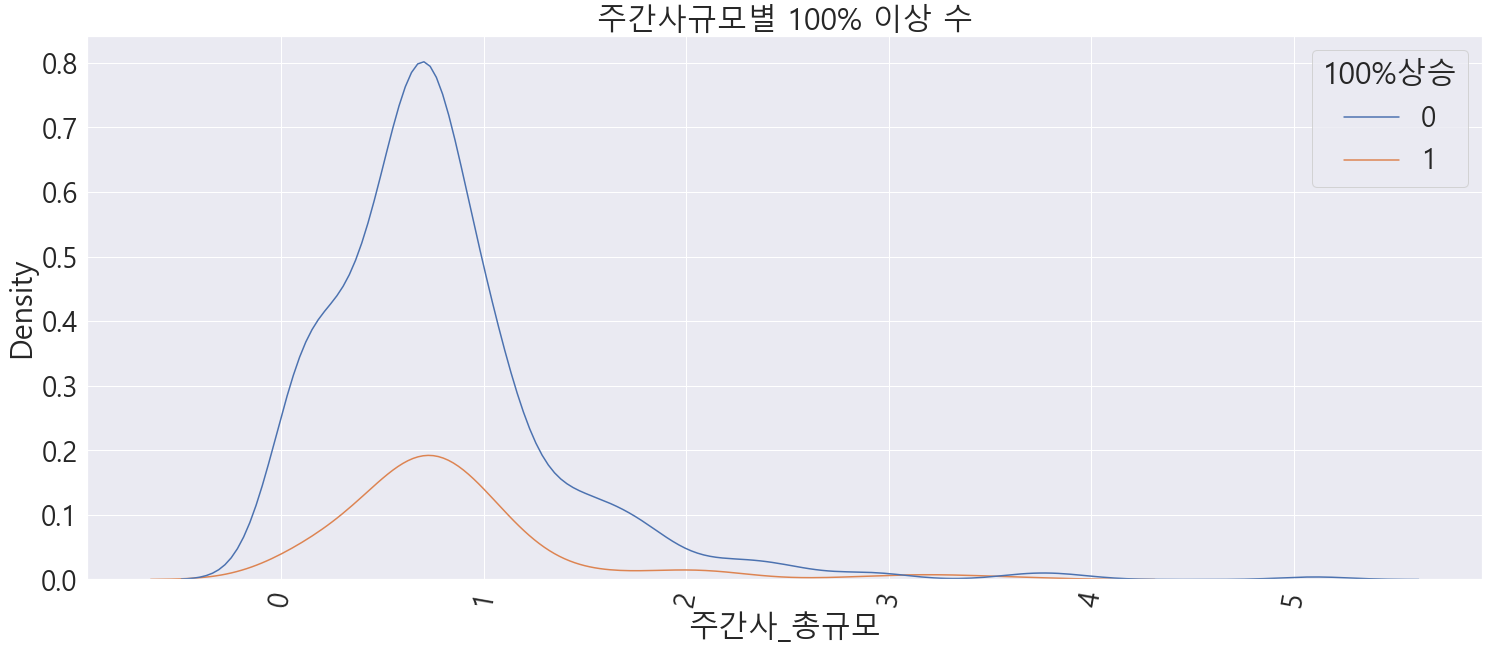

In [160]:
plt.figure(figsize=(25,10))

sns.kdeplot('주간사_총규모', hue='100%상승', data=original)
plt.title('주간사규모별 100% 이상 수')
plt.xticks(rotation=80)

plt.show()

In [161]:
sns.factorplot('상장년도', '100%상승', hue='시장구분', data=original, 
               size=10, aspect=2.0)
plt.show()

In [162]:
cols = heatmap_data.columns
cols

Index(['100%상승', '종속변수', '기관경쟁률', '의무보유확약비율', '전_거래일_종가', '전_거래일_거래량', '청약경쟁률',
       '상장년도', '상장분기', '구주매출비율', '자본금(백만원)', '주간사_총규모', '공모가', '총공모주식수',
       '순이익(백만원)', '신주모집', '매출액(백만원)'],
      dtype='object')

In [163]:
col = cols[1]

original['100%상승'] = original['100%상승'].astype('str')
plt.figure(figsize = (25, 3))

sns.boxplot(x = col,y='100%상승', data = original)

plt.show()

original['100%상승'] = original['100%상승'].astype('int')

In [164]:
k=0.95

q = original[col].quantile(k)
clean_cutting = original.loc[original[col]<q]

plt.figure(figsize=(25,10))
sns.kdeplot(clean_cutting.loc[original['100%상승']== 1, col])
sns.kdeplot(clean_cutting.loc[original['100%상승']!= 1 , col])

plt.title(f'{col}에 따른 100% 이상 비율 추이({col} < {int(q)} (Q{int(k*100)}))')
plt.legend(['100%이상(1)', '100%이하(0)'])
plt.show()

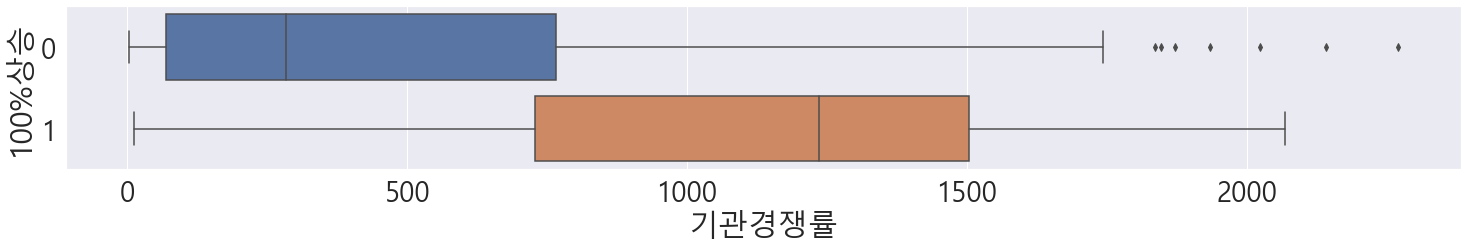

In [165]:
col = cols[2]

original['100%상승'] = original['100%상승'].astype('str')
plt.figure(figsize = (25, 3))

sns.boxplot(x = col,y='100%상승', data = original)

plt.show()

original['100%상승'] = original['100%상승'].astype('int')

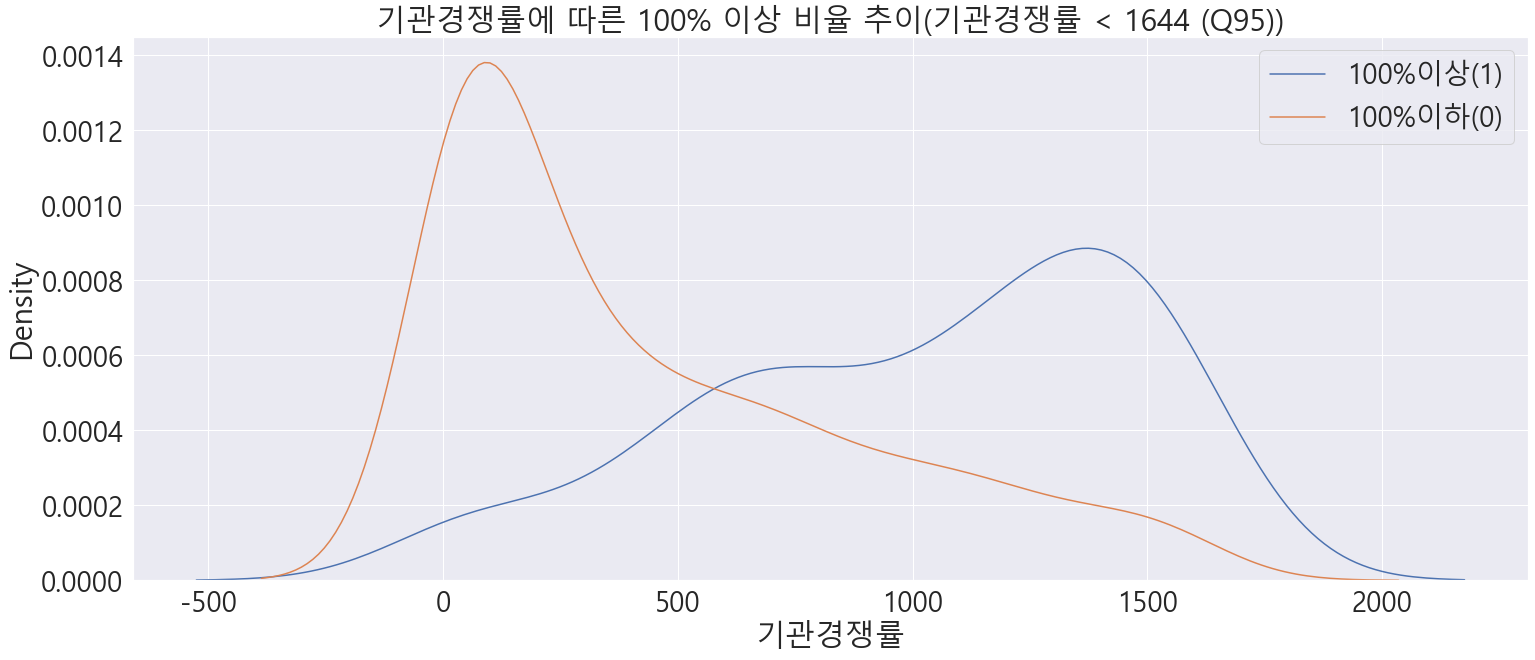

In [166]:
k=0.95
q = original[col].quantile(k)
clean_cutting = original.loc[original[col]<q]

plt.figure(figsize=(25,10))
sns.kdeplot(clean_cutting.loc[original['100%상승']== 1, col])
sns.kdeplot(clean_cutting.loc[original['100%상승']!= 1 , col])

plt.title(f'{col}에 따른 100% 이상 비율 추이({col} < {int(q)} (Q{int(k*100)}))')
plt.legend(['100%이상(1)', '100%이하(0)'])
plt.show()

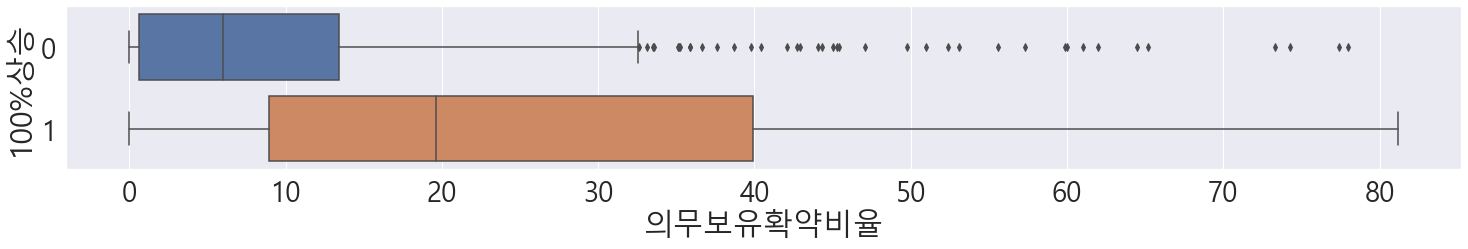

In [167]:
col = cols[3]

original['100%상승'] = original['100%상승'].astype('str')
plt.figure(figsize = (25, 3))

sns.boxplot(x = col,y='100%상승', data = original)

plt.show()

original['100%상승'] = original['100%상승'].astype('int')

In [168]:
k=0.95
q = original[col].quantile(k)
clean_cutting = original.loc[original[col]<q]

plt.figure(figsize=(25,10))
sns.kdeplot(clean_cutting.loc[original['100%상승']== 1, col])
sns.kdeplot(clean_cutting.loc[original['100%상승']!= 1 , col])

plt.title(f'{col}에 따른 100% 이상 비율 추이({col} < {int(q)} (Q{int(k*100)}))')
plt.legend(['100%이상(1)', '100%이하(0)'])
plt.show()

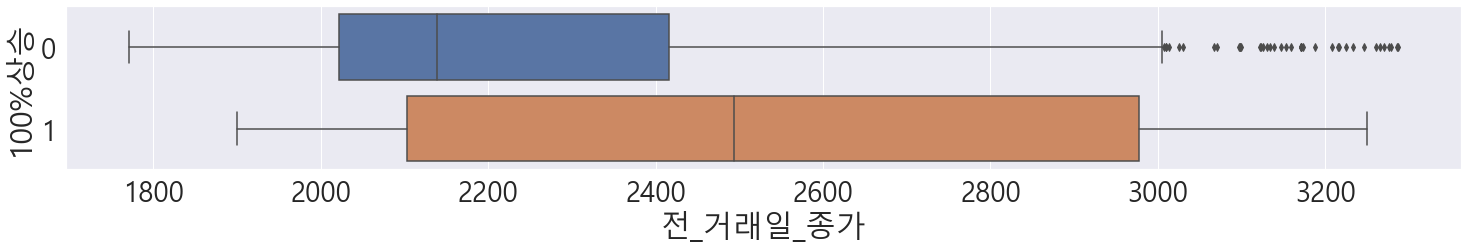

In [169]:
col = cols[4]

original['100%상승'] = original['100%상승'].astype('str')
plt.figure(figsize = (25, 3))

sns.boxplot(x = col,y='100%상승', data = original)

plt.show()

original['100%상승'] = original['100%상승'].astype('int')

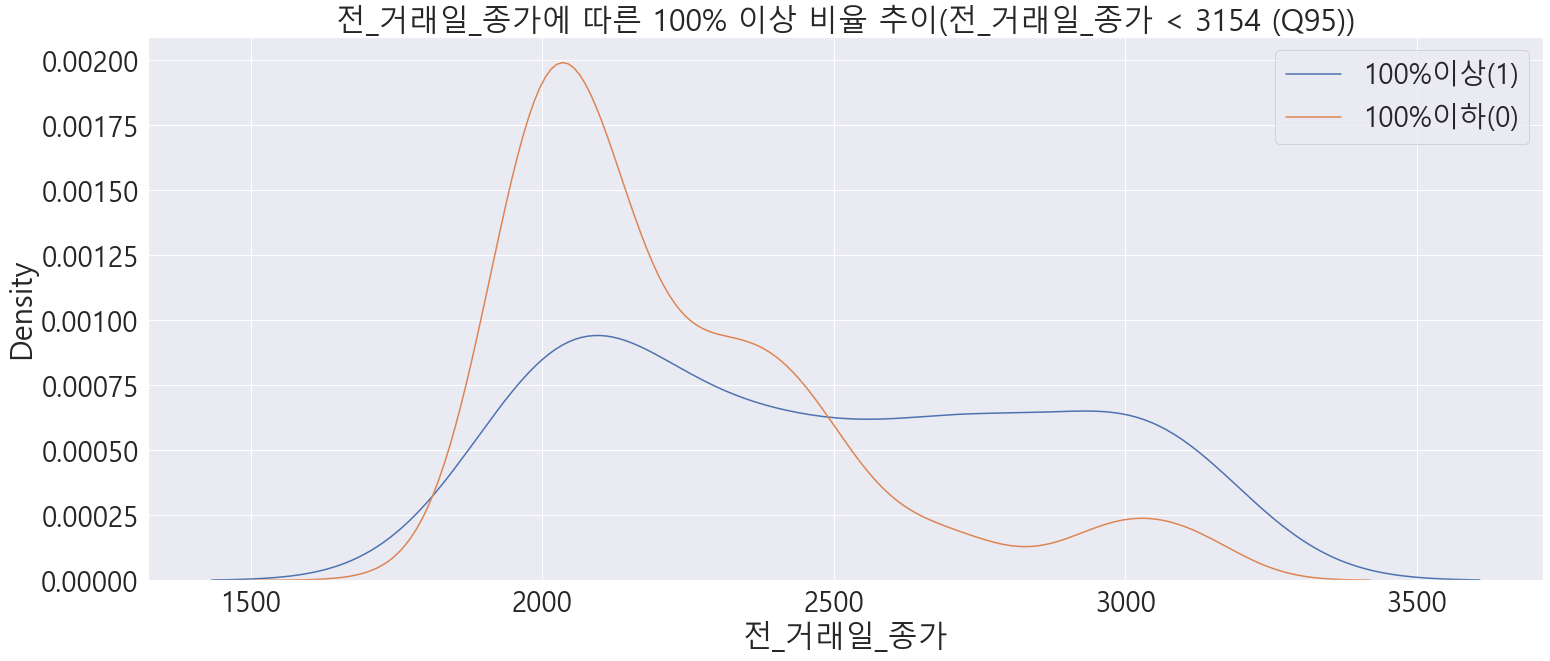

In [170]:
k=0.95
q = original[col].quantile(k)
clean_cutting = original.loc[original[col]<q]

plt.figure(figsize=(25,10))
sns.kdeplot(clean_cutting.loc[original['100%상승']== 1, col])
sns.kdeplot(clean_cutting.loc[original['100%상승']!= 1 , col])

plt.title(f'{col}에 따른 100% 이상 비율 추이({col} < {int(q)} (Q{int(k*100)}))')
plt.legend(['100%이상(1)', '100%이하(0)'])
plt.show()

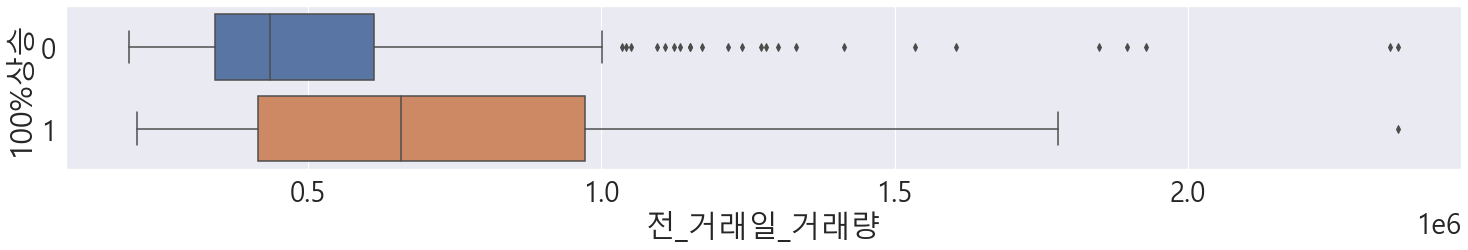

In [171]:
col = cols[5]

original['100%상승'] = original['100%상승'].astype('str')
plt.figure(figsize = (25, 3))

sns.boxplot(x = col,y='100%상승', data = original)

plt.show()

original['100%상승'] = original['100%상승'].astype('int')

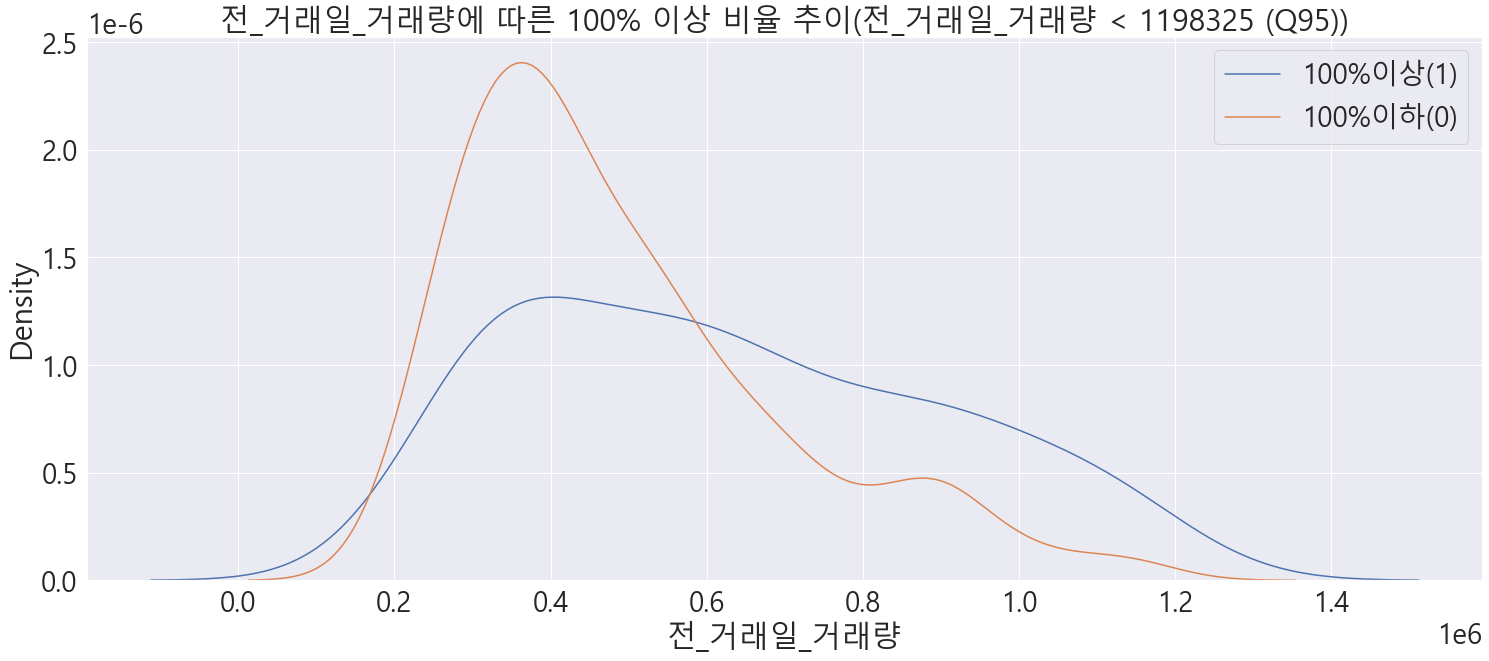

In [172]:
k=0.95
q = original[col].quantile(k)
clean_cutting = original.loc[original[col]<q]

plt.figure(figsize=(25,10))
sns.kdeplot(clean_cutting.loc[original['100%상승']== 1, col])
sns.kdeplot(clean_cutting.loc[original['100%상승']!= 1 , col])

plt.title(f'{col}에 따른 100% 이상 비율 추이({col} < {int(q)} (Q{int(k*100)}))')
plt.legend(['100%이상(1)', '100%이하(0)'])
plt.show()

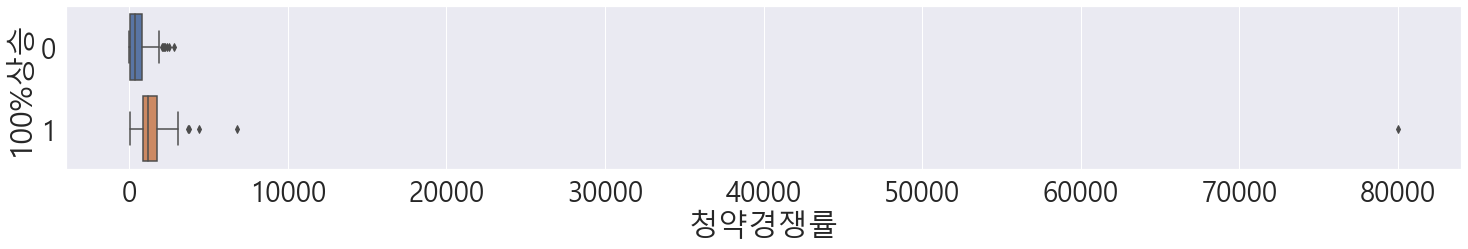

In [173]:
col = cols[6]

original['100%상승'] = original['100%상승'].astype('str')
plt.figure(figsize = (25, 3))

sns.boxplot(x = col,y='100%상승', data = original)

plt.show()

original['100%상승'] = original['100%상승'].astype('int')

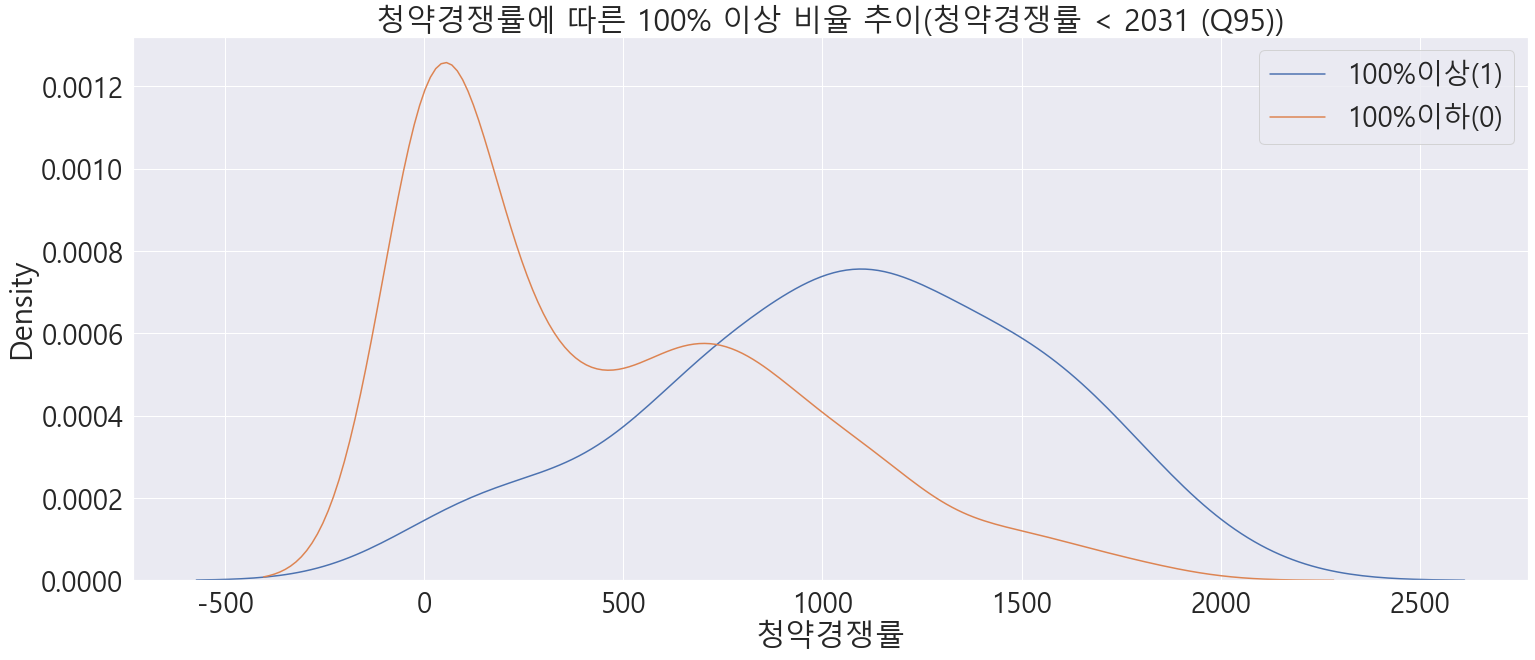

In [174]:
k=0.95
q = original[col].quantile(k)
clean_cutting = original.loc[original[col]<q]

plt.figure(figsize=(25,10))
sns.kdeplot(clean_cutting.loc[original['100%상승']== 1, col])
sns.kdeplot(clean_cutting.loc[original['100%상승']!= 1 , col])

plt.title(f'{col}에 따른 100% 이상 비율 추이({col} < {int(q)} (Q{int(k*100)}))')
plt.legend(['100%이상(1)', '100%이하(0)'])
plt.show()

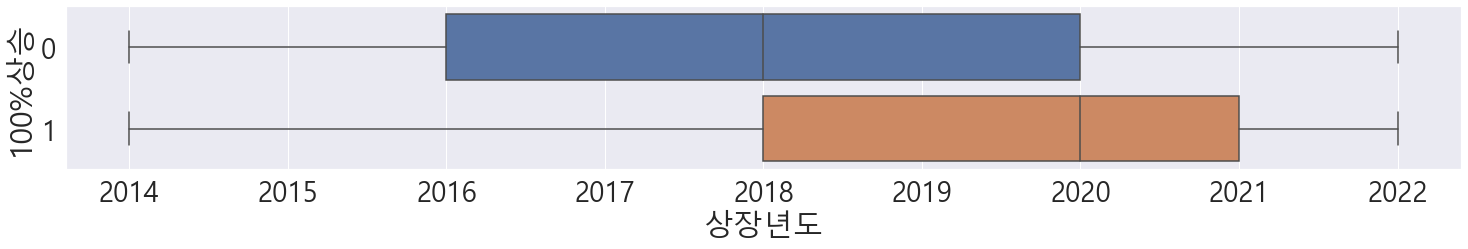

In [175]:
col = cols[7]

original['100%상승'] = original['100%상승'].astype('str')
plt.figure(figsize = (25, 3))

sns.boxplot(x = col,y='100%상승', data = original)

plt.show()

original['100%상승'] = original['100%상승'].astype('int')

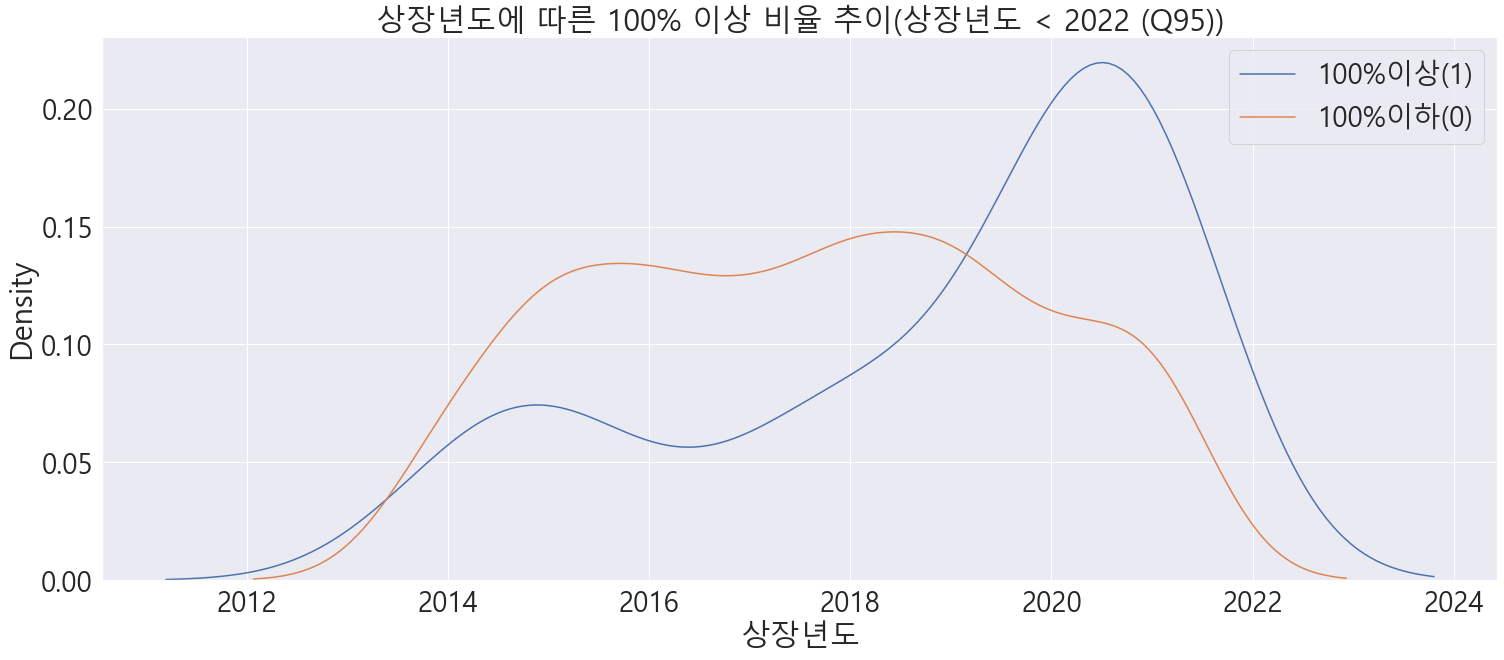

In [176]:
k=0.95
q = original[col].quantile(k)
clean_cutting = original.loc[original[col]<q]

plt.figure(figsize=(25,10))
sns.kdeplot(clean_cutting.loc[original['100%상승']== 1, col])
sns.kdeplot(clean_cutting.loc[original['100%상승']!= 1 , col])

plt.title(f'{col}에 따른 100% 이상 비율 추이({col} < {int(q)} (Q{int(k*100)}))')
plt.legend(['100%이상(1)', '100%이하(0)'])
plt.show()

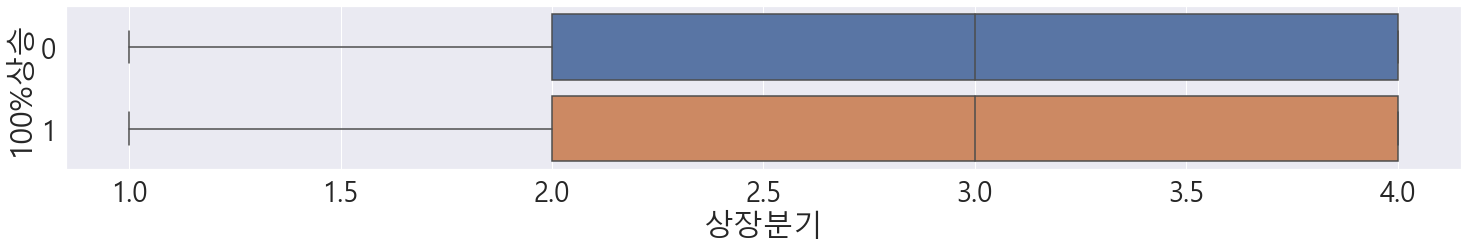

In [177]:
col = cols[8]

original['100%상승'] = original['100%상승'].astype('str')
plt.figure(figsize = (25, 3))

sns.boxplot(x = col,y='100%상승', data = original)

plt.show()

original['100%상승'] = original['100%상승'].astype('int')

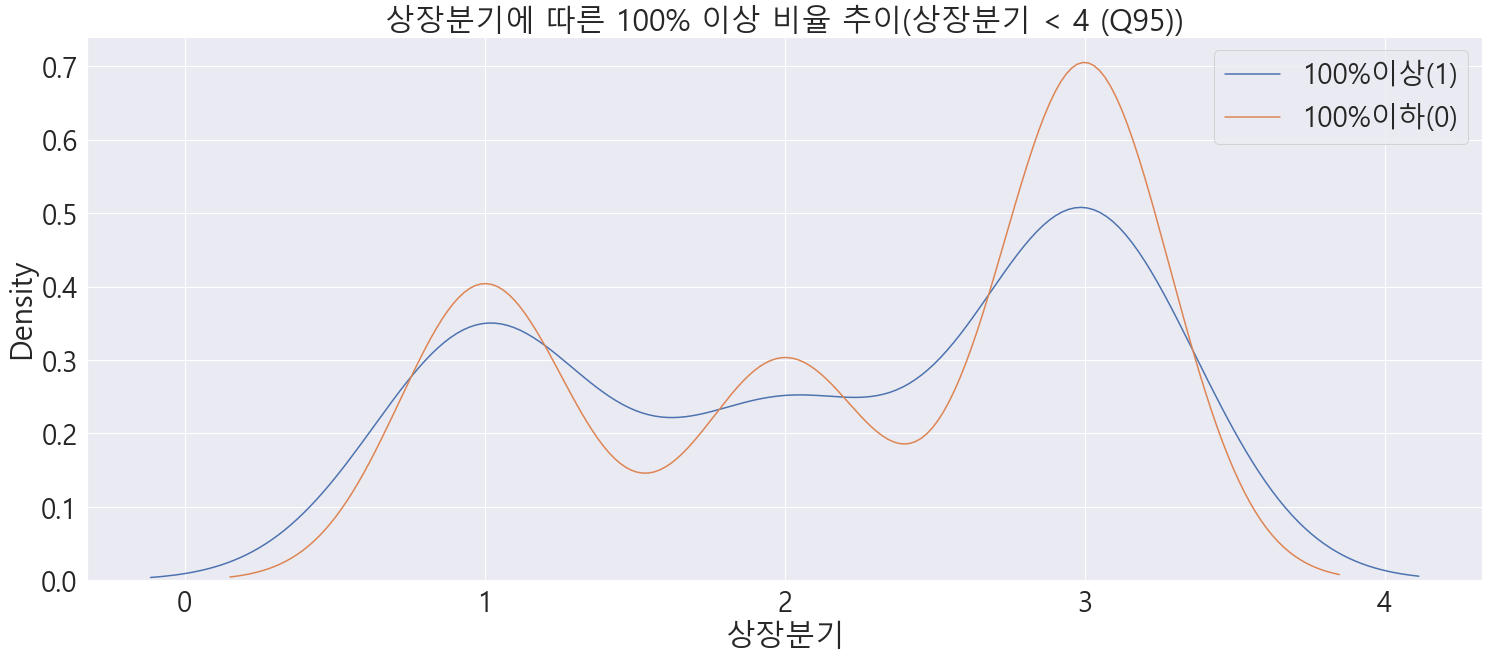

In [178]:
k=0.95
q = original[col].quantile(k)
clean_cutting = original.loc[original[col]<q]

plt.figure(figsize=(25,10))
sns.kdeplot(clean_cutting.loc[original['100%상승']== 1, col])
sns.kdeplot(clean_cutting.loc[original['100%상승']!= 1 , col])

plt.title(f'{col}에 따른 100% 이상 비율 추이({col} < {int(q)} (Q{int(k*100)}))')
plt.legend(['100%이상(1)', '100%이하(0)'])
plt.show()

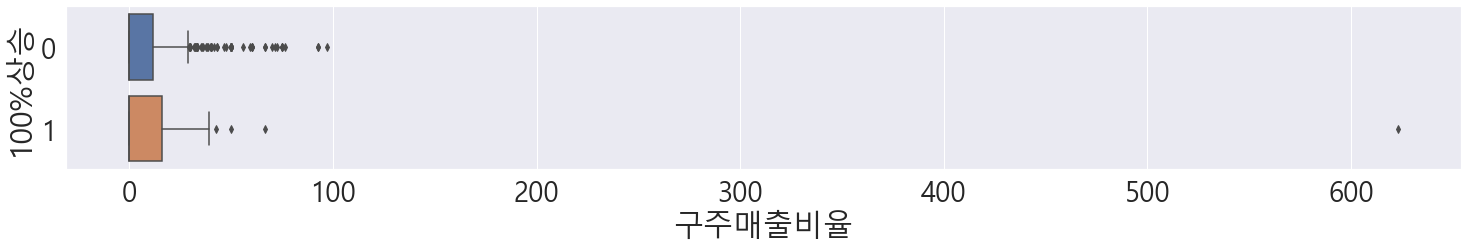

In [179]:
col = cols[9]

original['100%상승'] = original['100%상승'].astype('str')
plt.figure(figsize = (25, 3))

sns.boxplot(x = col,y='100%상승', data = original)

plt.show()

original['100%상승'] = original['100%상승'].astype('int')

In [180]:
k=0.95
q = original[col].quantile(k)
clean_cutting = original.loc[original[col]<q]

plt.figure(figsize=(25,10))
sns.kdeplot(clean_cutting.loc[original['100%상승']== 1, col])
sns.kdeplot(clean_cutting.loc[original['100%상승']!= 1 , col])

plt.title(f'{col}에 따른 100% 이상 비율 추이({col} < {int(q)} (Q{int(k*100)}))')
plt.legend(['100%이상(1)', '100%이하(0)'])
plt.show()

In [181]:
col = cols[10]

original['100%상승'] = original['100%상승'].astype('str')
plt.figure(figsize = (25, 3))

sns.boxplot(x = col,y='100%상승', data = original)

plt.show()

original['100%상승'] = original['100%상승'].astype('int')

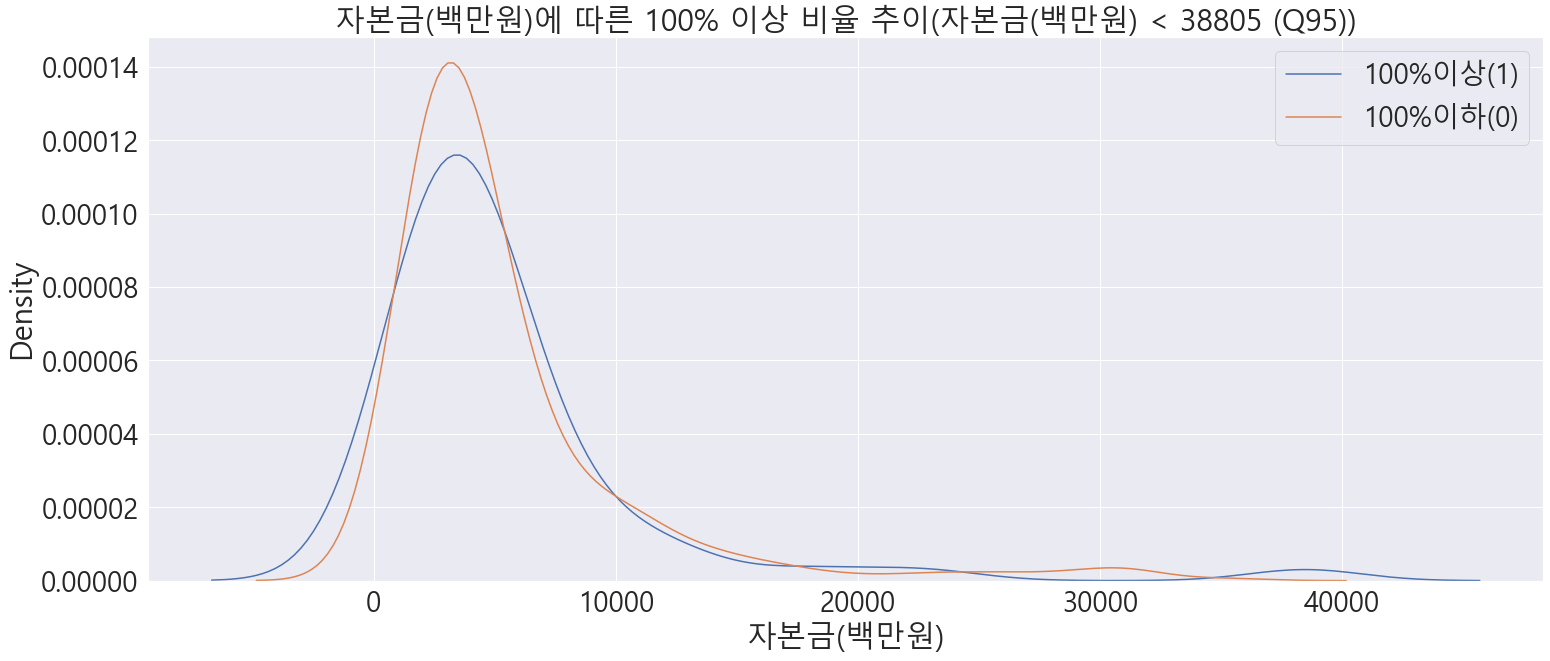

In [182]:
k=0.95
q = original[col].quantile(k)
clean_cutting = original.loc[original[col]<q]

plt.figure(figsize=(25,10))
sns.kdeplot(clean_cutting.loc[original['100%상승']== 1, col])
sns.kdeplot(clean_cutting.loc[original['100%상승']!= 1 , col])

plt.title(f'{col}에 따른 100% 이상 비율 추이({col} < {int(q)} (Q{int(k*100)}))')
plt.legend(['100%이상(1)', '100%이하(0)'])
plt.show()

In [183]:
col = cols[11]

original['100%상승'] = original['100%상승'].astype('str')
plt.figure(figsize = (25, 3))

sns.boxplot(x = col,y='100%상승', data = original)

plt.show()

original['100%상승'] = original['100%상승'].astype('int')

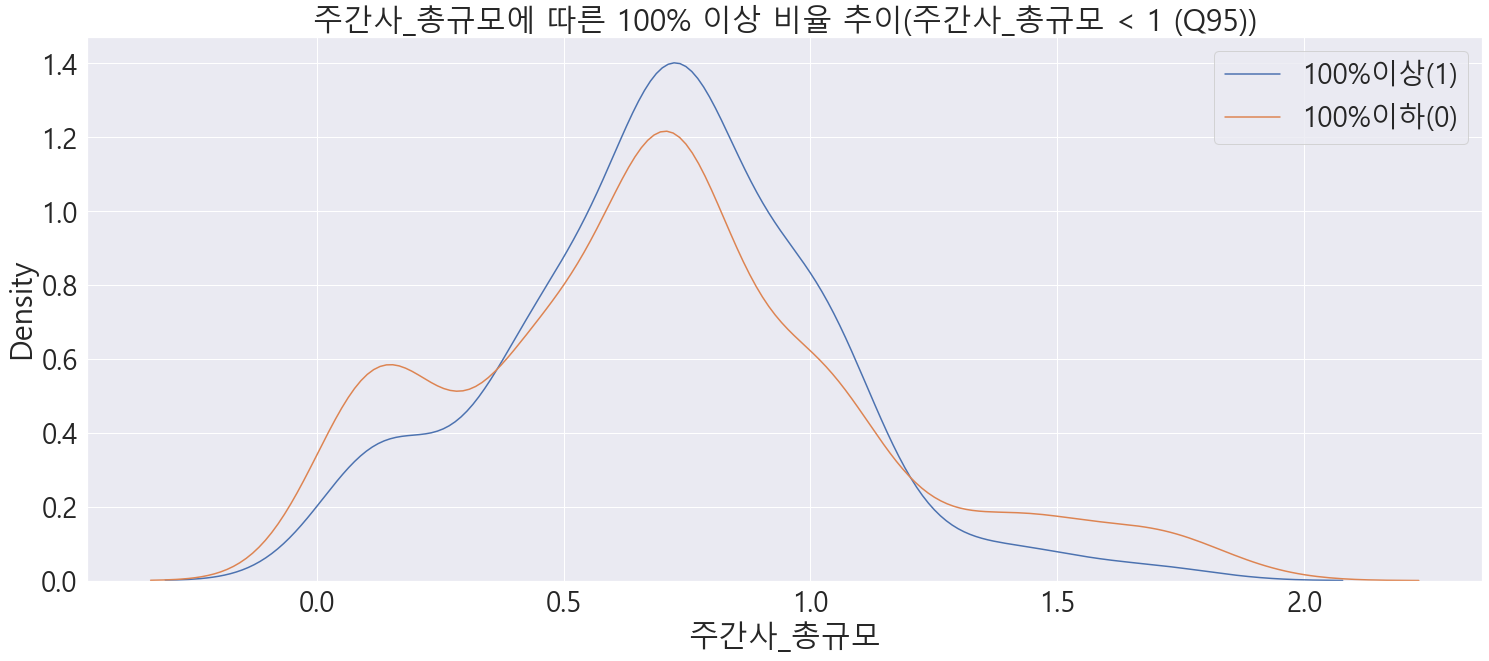

In [184]:
k=0.95
q = original[col].quantile(k)
clean_cutting = original.loc[original[col]<q]

plt.figure(figsize=(25,10))
sns.kdeplot(clean_cutting.loc[original['100%상승']== 1, col])
sns.kdeplot(clean_cutting.loc[original['100%상승']!= 1 , col])

plt.title(f'{col}에 따른 100% 이상 비율 추이({col} < {int(q)} (Q{int(k*100)}))')
plt.legend(['100%이상(1)', '100%이하(0)'])
plt.show()

In [185]:
original

전_거래일_거래량     전_거래일_종가        기업명    공모가    기관경쟁률    청약경쟁률    총공모주식수  \
0     657600.0  2477.449951  티쓰리엔터테인먼트   1700  1744.08  1384.30  17000000   
1     657600.0  2477.449951       티에프이  10500  1295.18    87.78   2700000   
2     758000.0  2483.159912     윤성에프앤씨  49000    67.49     1.73   1994762   
3     899000.0  2402.229980     디티앤씨알오  17000    74.53     5.73   1400000   
4     550300.0  2329.169922       뉴로메카  16900  1652.13  1181.88   1500000   
..         ...          ...        ...    ...      ...      ...       ...   
591   383700.0  2076.120117      덕신하우징  13000   650.72   899.07   2000000   
592   408800.0  2061.969971      창해에탄올   8300   578.20   675.79   1900871   
593   323600.0  2026.619995       윈하이텍   8300   444.10   589.58   2640000   
594   353500.0  2028.319946      아진엑스텍   7000   478.65   876.27   1000000   
595   274600.0  2018.500000  화인베스틸(유가)   4700    85.45   248.12   6433560   

         신주모집  매출액(백만원)  순이익(백만원)  자본금(백만원) 시장구분  의무보유확약비율  구주매출비율  종속변수  \
0    17000000     68666     10106      6558  코스닥      4.03    0.00     0   
1     2300000     71969      9849      1138  코스닥      5.30   14.81     0   
2     1695548     75894     -2915       797  코스닥      0.14   15.00     0   
3     1400000     32749      4328      2436  코스닥      0.00    0.00     0   
4     1500000      7333     -6668      5029  코스닥      7.60    0.00     0   
..        ...       ...       ...       ...  ...       ...     ...   ...   
591   2000000    104434     11718      4006  코스닥     59.86    0.00     0   
592   1900871     69032     14887      3087  코스닥     59.50    0.00     1   
593   2640000     57400      7122      3300  코스닥     55.60    0.00     0   
594   1000000     18913      3278      2815  코스닥      0.00    0.00     0   
595   6433560    224271     16948     16050  거래소      0.00    0.00     0   

     100%상승   주간사_총규모  상장년도  상장분기  
0         0  1.000000  2022     4  
1         0  0.063008  2022     4  
2         0  1.000000  2022     4  
3         0  0.450157  2022     4  
4         0  0.178037  2022     4  
..      ...       ...   ...   ...  
591       0  0.092443  2014     3  
592       1  0.663557  2014     3  
593       0  0.663557  2014     3  
594       0  0.486089  2014     3  
595       0  0.092443  2014     3  

[596 rows x 19 columns]

In [186]:
# original.to_csv('/content/drive/MyDrive/IPO/ipo_dataset/ipo_fe_1.csv')